In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Table_Optimal2015-08-15.csv')

In [3]:
print df.dtypes

$c^{1}$       int64
$c^{2}$       int64
$c^{3}$       int64
$c^{4}$       int64
$c^{5}$       int64
$y^{1}$       int64
$y^{2}$       int64
$y^{3}$       int64
$y^{4}$       int64
$y^{5}$       int64
$t$           int64
ExpValue    float64
$d_{0}$       int64
$d_{1}$       int64
$d_{2}$       int64
$d_{3}$       int64
$d_{4}$       int64
$d_{5}$       int64
dtype: object


In [4]:
df_Series2 = pd.DataFrame(index=['$d_{0}$', '%%%%%'], columns=range(6))

for j in df.groupby('$d_{0}$').size().index:
    df_Series2[j]['$d_{0}$'] = df.groupby('$d_{0}$').size()[j]
for j in df.groupby('$d_{0}$').size().index:    
    df_Series2[j]['%%%%%'] = np.around((df_Series2[j]['$d_{0}$']/df_Series2.sum(axis=1)['$d_{0}$'])*100, 2)

print df_Series2.to_latex()

\begin{tabular}{lllllll}
\toprule
{} &      0 &     1 &     2 &     3 &     4 &    5 \\
\midrule
\$d\_\{0\}\$ &  27750 &   461 &   570 &   912 &    79 &  NaN \\
\%\%\%\%\%   &  93.21 &  1.55 &  1.91 &  3.06 &  0.27 &  NaN \\
\bottomrule
\end{tabular}



In [5]:
df_Series = pd.DataFrame(index=df.dtypes[13:].index, columns=[0, 1,  2, 3])

for i in df.dtypes[13:].index:
    for j in df.groupby(i).size().index:
        df_Series[j][i] = df.groupby(i).size()[j]
    
for i in range(4):
    df_Series[str(i)+'%'] = pd.Series((df_Series[i]/df_Series.sum(axis=1))*100)
    for j in df_Series.index:
        df_Series[str(i)+'%'][j] = np.around(df_Series[str(i)+'%'][j], 2)
    
df_Series = df_Series.reindex_axis([0, '0%', 1, '1%', 2, '2%', 3, '3%'], axis=1)

print df_Series.to_latex()

\begin{tabular}{lllllllll}
\toprule
{} &      0 &     0\% &     1 &     1\% &     2 &     2\% &    3 &    3\% \\
\midrule
\$d\_\{1\}\$ &  29010 &  97.44 &   301 &   1.01 &   NaN &    NaN &  461 &  1.54 \\
\$d\_\{2\}\$ &  25387 &  85.27 &  1651 &   5.53 &  2436 &   8.16 &  298 &     1 \\
\$d\_\{3\}\$ &  21861 &  73.43 &  2847 &   9.54 &  4567 &   15.3 &  497 &  1.66 \\
\$d\_\{4\}\$ &  20793 &  69.84 &  5195 &  17.41 &  3768 &  12.62 &   16 &  0.05 \\
\$d\_\{5\}\$ &  21781 &  73.16 &  4935 &  16.54 &  3056 &  10.23 &  NaN &   NaN \\
\bottomrule
\end{tabular}



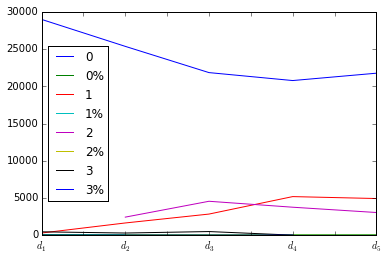

In [6]:
#plt.title("Verkauf der optimalen Politik")
#plt.ylabel("p[j](t)")
#plt.xlabel("t")
plt.figure()
df_Series.plot();